In [2]:
import pandas as pd
from matplotlib import dates as mpl_dates 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta 
from nltk.corpus import stopwords 

df = pd.read_csv('yyj.txt', delimiter='|', header=None, names=["day", "time", "user", "message"])
df

,day,time,user,message
0,2022-02-02,07:28:58,garruku,ratJAM 󠀀
1,2022-02-02,07:28:58,jakozzy,pro streamer catJAM
2,2022-02-02,07:29:00,r7goodman,duckJAM 󠀀 󠀀 󠀀 󠀀
3,2022-02-02,07:29:00,chriscage_,chrisc163Jamming 󠀀
4,2022-02-02,07:29:01,darkscarlatti,ratJAM
...,...,...,...,...
791484,2022-02-06,23:06:04,lara7_,catJAM RATZ OUT !!!
791485,2022-02-06,23:06:04,blazygalzt,KEKBye Chet
791486,2022-02-06,23:06:04,sadchels,peepoClap 󠀀
791487,2022-02-06,23:06:04,kuronekof5,peepoClap


In [3]:
#df.to_csv('data.csv')

In [4]:
today = datetime.today()
d2 = today.strftime("%B %d, %Y")
print(d2)

February 09, 2022


Searching By User

In [95]:
Searching_by_User = df[(df["user"] == "arkem232") & (df["message"] )].reset_index()
drop_index_from_Searching_by_User = Searching_by_User.drop(['index'], axis=1)
drop_index_from_Searching_by_User


,day,time,user,message
0,2022-02-02,07:33:14,arkem232,welp
1,2022-02-02,07:33:45,arkem232,yyjHey yyjHey yyjHey
2,2022-02-02,07:36:01,arkem232,not like you're cooking meth today Kappa
3,2022-02-02,07:36:14,arkem232,kiki is better
4,2022-02-02,07:36:23,arkem232,aigo
...,...,...,...,...
10758,2022-02-06,23:03:19,arkem232,Susge did you?
10759,2022-02-06,23:03:29,arkem232,yyjL yyjHey yyjL yyjHey yyjL yyjL
10760,2022-02-06,23:03:39,arkem232,yyjHey yyjL yyjHey yyjL yyjHey yyjL yyjHey yyjL
10761,2022-02-06,23:03:59,arkem232,yyjHey yyjL yyjHey yyjL yyjHey yyjL


In [96]:
pd.Series(' '.join(drop_index_from_Searching_by_User['message']).split()).value_counts()[:10].reset_index()

,index,0
0,the,454
1,it,401
2,you,380
3,a,316
4,is,311
5,to,296
6,I,260
7,Lmao,211
8,Lol,208
9,You,204


Other way for searching by user

In [7]:
#printing especific values from one chosen column
df.loc[df['user'] == "chrisCage_"]

,day,time,user,message


Searching By User and Message

In [94]:
Searching_by_User_and_msg = df[(df["user"] == "chriscage_") & (df["message"] == "chrisc163Jamming" )].reset_index()
drop_index_from_Searching_by_User_and_msg = Searching_by_User_and_msg.drop(['index'], axis=1)
drop_index_from_Searching_by_User_and_msg

,day,time,user,message
0,2022-02-02,07:29:04,chriscage_,chrisc163Jamming
1,2022-02-02,07:29:10,chriscage_,chrisc163Jamming
2,2022-02-02,07:30:17,chriscage_,chrisc163Jamming
3,2022-02-02,07:30:22,chriscage_,chrisc163Jamming
4,2022-02-02,07:30:26,chriscage_,chrisc163Jamming
5,2022-02-02,07:30:29,chriscage_,chrisc163Jamming
6,2022-02-02,08:26:46,chriscage_,chrisc163Jamming
7,2022-02-02,08:26:51,chriscage_,chrisc163Jamming
8,2022-02-02,11:14:00,chriscage_,chrisc163Jamming
9,2022-02-02,11:14:06,chriscage_,chrisc163Jamming


-----------------------------------------------------------------------------------------------------

MOST USED WORDS 

In [100]:
most_used_words = pd.Series(' '.join(df['message']).split()).value_counts()[:50].reset_index()
clean1 = most_used_words.replace('󠀀', np.nan, regex=True)
text_withoutNan = clean1.dropna(axis='rows')
text_withoutNan

#define values
values = ["The", "the", 'it', 'be', 'is', 'you', 'a', 'to', 'no', 'in', 'that', 'she', 'this', 'for', 'not', 'good', 'I', 'on', 'and', 'i', '1', '2']

#drop rows that contain any value in the list
textwithoutmostusedwords = text_withoutNan[text_withoutNan['index'].isin(values) == False]

#another way to search for most used words 
#df.message.value_counts().reset_index()

#--------------------------------------------------Saving in a document----------------------------------------------------------------
savetextwithoutmostusedwords = textwithoutmostusedwords.to_csv("topemotes.txt", sep=' ', header=False, index=False)
#------------------------------------------------------------------------------------------------------------------------------------

textwithoutmostusedwords

,index,0
1,KEKW,36157
2,PepeLaugh,24033
4,yyjPopcorn,20458
7,LUL,16517
9,xar2EDM,15201
11,YEP,14181
12,pepeD,13995
14,KEKInsane,13384
15,ratJAM,12977
16,PogU,11520


TOP CHATTERS


In [10]:
print("top chatters of", d2)
#total messages
topChatters = df.user.value_counts().reset_index()
totalChatters = int(topChatters['user'].sum())
print("Messages logged today =", totalChatters)
plot_index_Totalmsg = str('Total Messages ') +  str(totalChatters)
#total 20 chatters
top20Chatters = df.user.value_counts()[:20].reset_index()
totalTop20Chatters = int(top20Chatters['user'].sum())
print("Sum of total 20 messages =",totalTop20Chatters)
percentageTop20Chatter = round(((totalTop20Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 20 chatters =", percentageTop20Chatter)
plot_index_top20 = str('Percentage of Top 20 ') +  str(percentageTop20Chatter) + str("%")
#total 5 chatters
top5Chatters = df.user.value_counts()[:5].reset_index()
totalTop5Chatters = int(top5Chatters['user'].sum())
print("Sum of total 5 messages =",totalTop5Chatters)
percentageTop5Chatter = round(((totalTop5Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 5 chatters =", percentageTop5Chatter)
plot_index_top5 = str('Percentage of Top 5 ') +  str(percentageTop5Chatter) + str("%")
top20Chatters.rename(columns={"index": "User", "user": "Total"})

top chatters of February 09, 2022
Messages logged today = 791489
Sum of total 20 messages = 216931
Perentage of Top 20 chatters = 27.41
Sum of total 5 messages = 105173
Perentage of Top 5 chatters = 13.29


,User,Total
0,garruku,39614
1,allexxx1996,22882
2,zay_ih,17915
3,jondoni,13085
4,haruiswaifu,11677
5,arkem232,10763
6,skysage,10636
7,lightsir_,9481
8,thadoril,9447
9,happyfluffyteddy,9033


In [127]:
#name 1
nametop_1 = top20Chatters.loc[0, 'index']
Searching_by_User_top_1 = df[(df["user"] == nametop_1) & (df["message"] )]
Searching_by_UserTop_1_emote = pd.Series(' '.join(Searching_by_User_top_1['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser1 = Searching_by_UserTop_1_emote[Searching_by_UserTop_1_emote['index'].isin(values) == False].reset_index()
topemotefromtop1chatter = textwithoutmostusedwords_byuser1.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top1chatter = textwithoutmostusedwords_byuser1.loc[0,0]
#name 2
nametop_2 = top20Chatters.loc[1, 'index']
Searching_by_User_top_2 = df[(df["user"] == nametop_2) & (df["message"] )]
Searching_by_UserTop_2_emote = pd.Series(' '.join(Searching_by_User_top_2['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser2 = Searching_by_UserTop_2_emote[Searching_by_UserTop_2_emote['index'].isin(values) == False].reset_index()
topemotefromtop2chatter = textwithoutmostusedwords_byuser2.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top2chatter = textwithoutmostusedwords_byuser2.loc[0,0]
#name 3
nametop_3 = top20Chatters.loc[2, 'index']
Searching_by_User_top_3 = df[(df["user"] == nametop_3) & (df["message"] )]
Searching_by_UserTop_3_emote = pd.Series(' '.join(Searching_by_User_top_3['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser3 = Searching_by_UserTop_3_emote[Searching_by_UserTop_3_emote['index'].isin(values) == False].reset_index()
topemotefromtop3chatter = textwithoutmostusedwords_byuser3.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top3chatter = textwithoutmostusedwords_byuser3.loc[0,0]
#name 4
nametop_4 = top20Chatters.loc[3, 'index']
Searching_by_User_top_4 = df[(df["user"] == nametop_4) & (df["message"] )]
Searching_by_UserTop_4_emote = pd.Series(' '.join(Searching_by_User_top_4['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser4 = Searching_by_UserTop_4_emote[Searching_by_UserTop_4_emote['index'].isin(values) == False].reset_index()
topemotefromtop4chatter = textwithoutmostusedwords_byuser4.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top4chatter = textwithoutmostusedwords_byuser4.loc[0,0]
#name 5
nametop_5 = top20Chatters.loc[4, 'index']
Searching_by_User_top_5 = df[(df["user"] == nametop_5) & (df["message"] )]
Searching_by_UserTop_5_emote = pd.Series(' '.join(Searching_by_User_top_5['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser5 = Searching_by_UserTop_5_emote[Searching_by_UserTop_5_emote['index'].isin(values) == False].reset_index()
topemotefromtop5chatter = textwithoutmostusedwords_byuser5.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top5chatter = textwithoutmostusedwords_byuser5.loc[0,0]
#name 6
nametop_6 = top20Chatters.loc[5, 'index']
Searching_by_User_top_6 = df[(df["user"] == nametop_6) & (df["message"] )]
Searching_by_UserTop_6_emote = pd.Series(' '.join(Searching_by_User_top_6['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser6 = Searching_by_UserTop_6_emote[Searching_by_UserTop_6_emote['index'].isin(values) == False].reset_index()
topemotefromtop6chatter = textwithoutmostusedwords_byuser6.loc[0,'index']
howManyTimesWasUsedThe_topemotefrom_top6chatter = textwithoutmostusedwords_byuser6.loc[0,0]
#name 7
nametop_7 = top20Chatters.loc[6, 'index']
Searching_by_User_top_7 = df[(df["user"] == nametop_7) & (df["message"] )]
Searching_by_UserTop_7_emote = pd.Series(' '.join(Searching_by_User_top_7['message']).split()).value_counts()[:2].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser7 = Searching_by_UserTop_7_emote[Searching_by_UserTop_7_emote['index'].isin(values) == False].reset_index()
topemotefromtop7chatter = textwithoutmostusedwords_byuser7.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top7chatter = textwithoutmostusedwords_byuser7.loc[0,0]
#name 8
nametop_8 = top20Chatters.loc[7, 'index']
Searching_by_User_top_8 = df[(df["user"] == nametop_8) & (df["message"] )]
Searching_by_UserTop_8_emote = pd.Series(' '.join(Searching_by_User_top_8['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser8 = Searching_by_UserTop_8_emote[Searching_by_UserTop_8_emote['index'].isin(values) == False].reset_index()
topemotefromtop8chatter = textwithoutmostusedwords_byuser8.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top8chatter = textwithoutmostusedwords_byuser8.loc[0,0]
#name 9
nametop_9 = top20Chatters.loc[8, 'index']
Searching_by_User_top_9 = df[(df["user"] == nametop_9) & (df["message"] )]
Searching_by_UserTop_9_emote = pd.Series(' '.join(Searching_by_User_top_9['message']).split()).value_counts()[:2].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser9 = Searching_by_UserTop_9_emote[Searching_by_UserTop_9_emote['index'].isin(values) == False].reset_index()
topemotefromtop9chatter = textwithoutmostusedwords_byuser9.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top9chatter = textwithoutmostusedwords_byuser9.loc[0,0]
#name 10
nametop_10 = top20Chatters.loc[9, 'index']
Searching_by_User_top_10 = df[(df["user"] == nametop_10) & (df["message"] )]
Searching_by_UserTop_10_emote = pd.Series(' '.join(Searching_by_User_top_10['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser10 = Searching_by_UserTop_10_emote[Searching_by_UserTop_10_emote['index'].isin(values) == False].reset_index()
topemotefromtop10chatter = textwithoutmostusedwords_byuser10.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top10chatter = textwithoutmostusedwords_byuser10.loc[0,0]
#name 11
nametop_11 = top20Chatters.loc[10, 'index']
Searching_by_User_top_11 = df[(df["user"] == nametop_11) & (df["message"] )]
Searching_by_UserTop_11_emote = pd.Series(' '.join(Searching_by_User_top_11['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser11 = Searching_by_UserTop_11_emote[Searching_by_UserTop_11_emote['index'].isin(values) == False].reset_index()
topemotefromtop11chatter = textwithoutmostusedwords_byuser11.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top11chatter = textwithoutmostusedwords_byuser11.loc[0,0]
#name 12
nametop_12 = top20Chatters.loc[11, 'index']
Searching_by_User_top_12 = df[(df["user"] == nametop_12) & (df["message"] )]
Searching_by_UserTop_12_emote = pd.Series(' '.join(Searching_by_User_top_12['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser12 = Searching_by_UserTop_12_emote[Searching_by_UserTop_12_emote['index'].isin(values) == False].reset_index()
topemotefromtop12chatter = textwithoutmostusedwords_byuser12.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top12chatter = textwithoutmostusedwords_byuser12.loc[0,0]
#name 13
nametop_13 = top20Chatters.loc[12, 'index']
Searching_by_User_top_13 = df[(df["user"] == nametop_13) & (df["message"] )]
Searching_by_UserTop_13_emote = pd.Series(' '.join(Searching_by_User_top_13['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser13 = Searching_by_UserTop_13_emote[Searching_by_UserTop_13_emote['index'].isin(values) == False].reset_index()
topemotefromtop13chatter = textwithoutmostusedwords_byuser13.loc[1, 'index']
howManyTimesWasUsedThe_topemotefrom_top13chatter = textwithoutmostusedwords_byuser13.loc[1,0]
#name 14
nametop_14 = top20Chatters.loc[13, 'index']
Searching_by_User_top_14 = df[(df["user"] == nametop_14) & (df["message"] )]
Searching_by_UserTop_14_emote = pd.Series(' '.join(Searching_by_User_top_14['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser14 = Searching_by_UserTop_14_emote[Searching_by_UserTop_14_emote['index'].isin(values) == False].reset_index()
topemotefromtop14chatter = textwithoutmostusedwords_byuser14.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top14chatter = textwithoutmostusedwords_byuser14.loc[0,0]
#name 15
nametop_15 = top20Chatters.loc[14, 'index']
Searching_by_User_top_15 = df[(df["user"] == nametop_15) & (df["message"] )]
Searching_by_UserTop_15_emote = pd.Series(' '.join(Searching_by_User_top_15['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser15 = Searching_by_UserTop_15_emote[Searching_by_UserTop_15_emote['index'].isin(values) == False].reset_index()
topemotefromtop15chatter = textwithoutmostusedwords_byuser15.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top15chatter = textwithoutmostusedwords_byuser15.loc[0,0]
#name 16
nametop_16 = top20Chatters.loc[15, 'index']
Searching_by_User_top_16 = df[(df["user"] == nametop_16) & (df["message"] )]
Searching_by_UserTop_16_emote = pd.Series(' '.join(Searching_by_User_top_16['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser16 = Searching_by_UserTop_16_emote[Searching_by_UserTop_16_emote['index'].isin(values) == False].reset_index()
topemotefromtop16chatter = textwithoutmostusedwords_byuser16.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top16chatter = textwithoutmostusedwords_byuser16.loc[0,0]
#name 17
nametop_17 = top20Chatters.loc[16, 'index']
Searching_by_User_top_17 = df[(df["user"] == nametop_17) & (df["message"] )]
Searching_by_UserTop_17_emote = pd.Series(' '.join(Searching_by_User_top_17['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser17 = Searching_by_UserTop_17_emote[Searching_by_UserTop_17_emote['index'].isin(values) == False].reset_index()
topemotefromtop17chatter = textwithoutmostusedwords_byuser17.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top17chatter = textwithoutmostusedwords_byuser17.loc[0,0]
#name 18
nametop_18 = top20Chatters.loc[17, 'index']
Searching_by_User_top_18 = df[(df["user"] == nametop_18) & (df["message"] )]
Searching_by_UserTop_18_emote = pd.Series(' '.join(Searching_by_User_top_18['message']).split()).value_counts()[:10].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser18 = Searching_by_UserTop_18_emote[Searching_by_UserTop_18_emote['index'].isin(values) == False].reset_index()
topemotefromtop18chatter = textwithoutmostusedwords_byuser18.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top18chatter = textwithoutmostusedwords_byuser18.loc[0,0]
#name 19
nametop_19 = top20Chatters.loc[18, 'index']
Searching_by_User_top_19 = df[(df["user"] == nametop_19) & (df["message"] )]
Searching_by_UserTop_19_emote = pd.Series(' '.join(Searching_by_User_top_19['message']).split()).value_counts()[:2].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser19 = Searching_by_UserTop_19_emote[Searching_by_UserTop_19_emote['index'].isin(values) == False].reset_index()
topemotefromtop19chatter = textwithoutmostusedwords_byuser19.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top19chatter = textwithoutmostusedwords_byuser19.loc[0,0]
#name 20
nametop_20 = top20Chatters.loc[19, 'index']
Searching_by_User_top_20 = df[(df["user"] == nametop_20) & (df["message"] )]
Searching_by_UserTop_20_emote = pd.Series(' '.join(Searching_by_User_top_20['message']).split()).value_counts()[:2].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
textwithoutmostusedwords_byuser20 = Searching_by_UserTop_20_emote[Searching_by_UserTop_20_emote['index'].isin(values) == False].reset_index()
topemotefromtop20chatter = textwithoutmostusedwords_byuser20.loc[0, 'index']
howManyTimesWasUsedThe_topemotefrom_top20chatter = textwithoutmostusedwords_byuser20.loc[0,0]

In [128]:
print("top chatters of", d2)
#total messages
topChatters = df.user.value_counts().reset_index()
totalChatters = int(topChatters['user'].sum())
print("Messages logged today =", totalChatters)
plot_index_Totalmsg = str('Total Messages ') +  str(totalChatters)
#total 20 chatters
top20Chatters = df.user.value_counts()[:20].reset_index()
totalTop20Chatters = int(top20Chatters['user'].sum())
print("Sum of total 20 messages =",totalTop20Chatters)
percentageTop20Chatter = round(((totalTop20Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 20 chatters =", percentageTop20Chatter)
plot_index_top20 = str('Percentage of Top 20 ') +  str(percentageTop20Chatter) + str("%")
#total 5 chatters
top5Chatters = df.user.value_counts()[:5].reset_index()
totalTop5Chatters = int(top5Chatters['user'].sum())
print("Sum of total 5 messages =",totalTop5Chatters)
percentageTop5Chatter = round(((totalTop5Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 5 chatters =", percentageTop5Chatter)
plot_index_top5 = str('Percentage of Top 5 ') +  str(percentageTop5Chatter) + str("%")
top20Chatters['Most used emote by user'] = pd.Series([topemotefromtop1chatter,topemotefromtop2chatter,topemotefromtop3chatter,topemotefromtop4chatter,topemotefromtop5chatter,
                                                      topemotefromtop6chatter,topemotefromtop7chatter,topemotefromtop8chatter,topemotefromtop9chatter,topemotefromtop10chatter,
                                                      topemotefromtop11chatter,topemotefromtop12chatter,topemotefromtop13chatter,topemotefromtop14chatter,topemotefromtop15chatter,
                                                      topemotefromtop16chatter,topemotefromtop17chatter,topemotefromtop18chatter,topemotefromtop19chatter,topemotefromtop20chatter])

top20Chatters['Times used'] = pd.Series([howManyTimesWasUsedThe_topemotefrom_top1chatter,howManyTimesWasUsedThe_topemotefrom_top2chatter,howManyTimesWasUsedThe_topemotefrom_top3chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top4chatter,howManyTimesWasUsedThe_topemotefrom_top5chatter,howManyTimesWasUsedThe_topemotefrom_top6chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top7chatter,howManyTimesWasUsedThe_topemotefrom_top8chatter,howManyTimesWasUsedThe_topemotefrom_top9chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top10chatter,howManyTimesWasUsedThe_topemotefrom_top11chatter,howManyTimesWasUsedThe_topemotefrom_top12chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top13chatter,howManyTimesWasUsedThe_topemotefrom_top14chatter,howManyTimesWasUsedThe_topemotefrom_top15chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top16chatter,howManyTimesWasUsedThe_topemotefrom_top17chatter,howManyTimesWasUsedThe_topemotefrom_top18chatter,
                                                      howManyTimesWasUsedThe_topemotefrom_top19chatter,howManyTimesWasUsedThe_topemotefrom_top20chatter])
top20Chatters.rename(columns={"index": "User", "user": "Total"})


top chatters of February 09, 2022
Messages logged today = 791489
Sum of total 20 messages = 216931
Perentage of Top 20 chatters = 27.41
Sum of total 5 messages = 105173
Perentage of Top 5 chatters = 13.29


,User,Total,Most used emote by user,Times used
0,garruku,39614,yyjPopcorn,10006
1,allexxx1996,22882,yyjPopcorn,4524
2,zay_ih,17915,PepeLaugh,2457
3,jondoni,13085,LULW,998
4,haruiswaifu,11677,KEKW,1400
5,arkem232,10763,Lmao,211
6,skysage,10636,KEKW,1013
7,lightsir_,9481,KEKW,1113
8,thadoril,9447,Hmm,848
9,happyfluffyteddy,9033,KEKWiggle,950


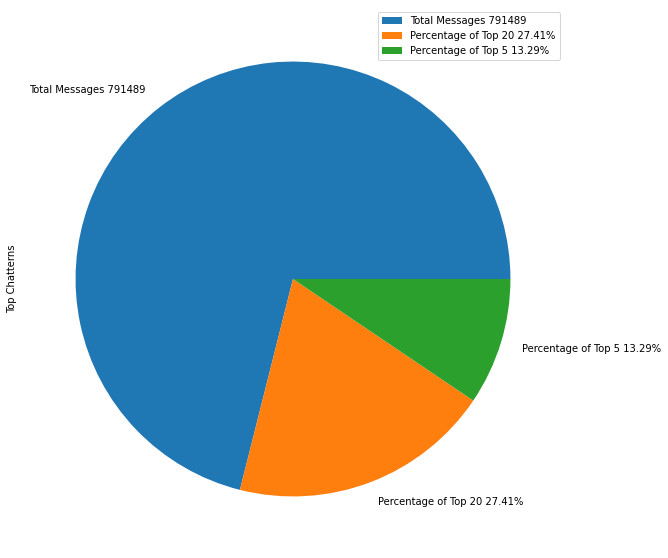

In [ ]:
   
top_chatters_frame = pd.DataFrame({'Top Chatterns' : [totalChatters, totalTop20Chatters, totalTop5Chatters]}, index=[plot_index_Totalmsg, plot_index_top20, plot_index_top5])
top_chatters_frame
plot = top_chatters_frame.plot.pie(y='Top Chatterns', figsize=(10, 10))

In [ ]:
# Procesin text cleaning most used words thx chubbeh ヽ(>∀<☆)ノ
text_data = text_withoutNan
txt = str(text_data)
len(txt)
txt = nltk.word_tokenize(txt)
txt = nltk.Text(txt)
txt.count("in")
stop_words = set(stopwords.words('english')) 
filtered_text_data = text_data[text_data["index"] in stop_words] 
print(filtered_text_data)


TypeError: unhashable type: 'Series'